### SMS Spam Detection


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)



In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.rename(columns={'v1': 'label', 'v2': 'text'}, inplace=True)

In [7]:
df.shape

(5572, 2)

In [8]:
df.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
df['length'] = df['text'].apply(len)

<Axes: ylabel='Frequency'>

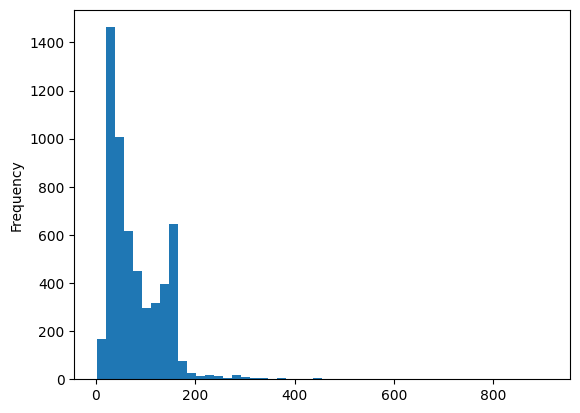

In [10]:
df['length'].plot(bins=50, kind='hist')

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

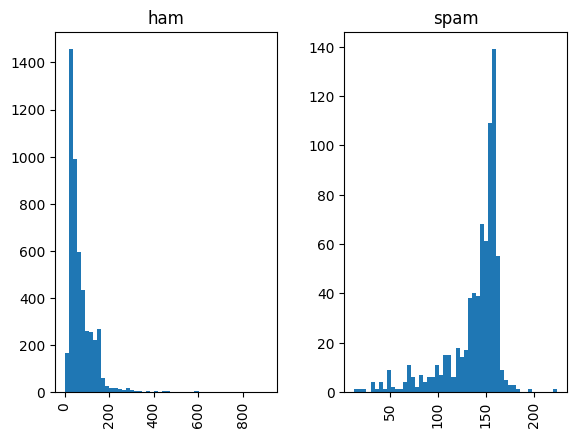

In [11]:
df['length'].hist(by=df['label'], bins=50)

In [12]:
df['label']=df['label'].map({'ham':0,'spam':1})

In [13]:
#NLTK Natural Language Toolkit
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import BlanklineTokenizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob # yazinin hangi dile yazildigini anliyoruz cok onemli
from langdetect import detect
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image


import warnings
warnings.filterwarnings('ignore')
import nltk

In [14]:
df['text'] = df['text'].str.lower()

In [15]:
df['text'] = df['text'].str.replace('[^\w\s]','')

In [16]:
df['text'] = df['text'].str.replace('\d','')

In [17]:
df['text'] = df['text'].str.replace('\n','')

In [18]:
df['text'] = df['text'].str.replace('\r','')

In [19]:
df['text'] = df['text'].str.replace('\t','')

In [20]:
df['text'] = df['text'].str.replace('rt','')

In [21]:
from nltk.stem import PorterStemmer
pr = PorterStemmer()

In [22]:
def tokenize_and_stem(text):
    tokens = nltk.word_tokenize(text)
    stemmed_tokens = [pr.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

In [23]:
df['text'] = df['text'].apply(tokenize_and_stem)


In [24]:
def lemma(text):
    words=TextBlob(text).words
    return [pr.stem(word) for word in words]

In [25]:
x=df['text']
y=df['label']


In [26]:
vect=CountVectorizer(stop_words='english', analyzer=lemma)
x_vect=vect.fit_transform(x)

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_vect, y, test_size = 0.20, random_state = 42)

In [28]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()


In [29]:
nb.fit(x_train, y_train)

MultinomialNB()

In [30]:
predictions = nb.predict(x_test)

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score,accuracy_score, precision_score, recall_score, f1_score


In [32]:
cm = confusion_matrix(y_test, predictions)
acc = accuracy_score(y_test, predictions)


In [33]:
cm

array([[953,  12],
       [ 12, 138]], dtype=int64)

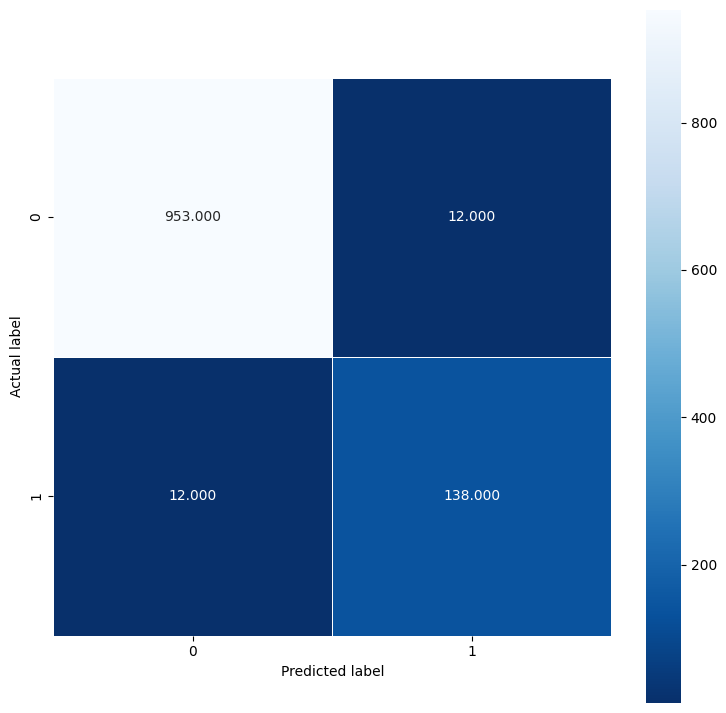

In [34]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [35]:
acc

0.97847533632287

In [36]:
prec = precision_score(y_test, predictions)
rec = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

In [37]:
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

Accuracy score: 0.97847533632287
Precision score: 0.92
Recall score: 0.92
F1 score: 0.92


In [38]:
#save model
import pickle
pickle.dump(nb, open('spamdetectionmodel.h5', 'wb'))